In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


##Carga de base de datos principal para moleculas  (molecule)


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
#Comma separated value text file containing information on the
#entire dataset of acceptor molecules, 51280 in total

data = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc2.csv')
data.head()


,index,inchikey,smiles,HOMO_calc,LUMO_calc,LUMO_calib,LUMO_calib_stds,HOMO_calib,HOMO_calib_stds,GAP_calib,molW,GAP_calc,PCE_calc,Voc_calc,Jsc_calc,FF_calc,EQE_calc,PCE_calib,Voc_calib,Jsc_calib,FF_calib,EQE_calib,PCE_cdiff,PCE_calib_plus
0,0,XYUYDHFIISREFR-UHFFFAOYNA-N,CN1C(=O)C(=Cc2occc2C(=O)c2ccc(-c3ncc(C4=CC=CC5...,-6.236230,-3.127170,-3.708691,0.272688,-6.310338,0.223776,2.601647,588.552,3.109059,0.875233,1.572830,8.564253,0.65,0.65,2.112606,0.991309,32.798726,0.65,0.65,1.237374,1.232105
1,1,PHWHUZBDROGCOQ-UHFFFAOYNA-N,CN1C(=O)C(=CC2=CC=C(c3cnc(-c4ccc(C(=O)c5ccoc5)...,-6.339430,-3.704750,-4.256720,0.271643,-6.461128,0.222483,2.204408,588.552,2.634680,1.968920,0.995250,30.446926,0.65,0.65,1.980828,0.443280,68.772742,0.65,0.65,0.011908,0.572272
2,2,OPESLBWKEFWREF-UHFFFAOYNA-N,CN1C(=O)C(=Cc2ncc(-c3ccc(C(=O)c4cocc4C=Cc4ccnc...,-6.406977,-3.581290,-4.091198,0.264892,-6.466049,0.219944,2.374851,527.522,2.825687,1.377548,1.118710,18.951200,0.65,0.65,2.030503,0.608802,51.330433,0.65,0.65,0.652955,1.160089
3,3,ZBIIYLIGWGDVFT-UHFFFAOYNA-N,CN1C(=O)C(=Cc2nccc(C=Cc3cocc3C(=O)c3ccc(-c4cnc...,-6.438564,-3.095938,-3.646241,0.268056,-6.534126,0.221199,2.887886,527.522,3.342626,0.495782,1.604062,4.756826,0.65,0.65,1.130062,1.053759,16.504735,0.65,0.65,0.634280,0.394002
4,4,SHQQQXHEKIZGPP-UHFFFAOYNA-N,CN1C(=O)C(=Cc2sc(C#N)c(-c3ncc(-c4ccsc4C(=O)c4c...,-6.859940,-3.555118,-4.037025,0.268006,-6.913465,0.220382,2.876440,554.569,3.304822,0.394496,1.144882,5.303097,0.65,0.65,0.729398,0.662975,16.932270,0.65,0.65,0.334902,0.000000


In [4]:
#Comma separated value text file containing information on the 112
#fragments used to build the library of molecules

data3 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc3.csv')
data3.head()


,index,group,label,smiles,PCE_stats,PCE_mean,PCE_std,Global_pop_num,Global_pop_percent,PCE < 8_pop_num,PCE < 8_pop_percent,PCE > 8_pop_num,PCE > 8_pop_percent,pop_diff,Z,Z_8.0,Z_8.5,Z_9.0,Z_9.5,Z_10.0,Z_10.5
0,62,terminal,f 62,C=C1N(C2=CC=CC=C2O1)C,"{'25%': 1.4897794525169601, 'std': 2.001056154...",2.888581,2.001056,424,0.827220,420,0.821516,4,3.076923,2.255407,2.816744,2.816744,4.311612,1.198000,NaN,NaN,NaN
1,63,terminal,f 63,C=C1N(C)C2=CC=CC=C2C1(C)C,"{'25%': 0.93461738578791276, 'std': 1.53869154...",2.090048,1.538692,2199,4.290229,2195,4.293399,4,3.076923,-1.216475,-0.699465,-0.699465,-0.694377,0.258349,-0.258720,NaN,NaN
2,64,terminal,f 64,C=C1N(C2=CC=CC=C2S1)C,"{'25%': 1.3221597699351173, 'std': 1.374290633...",2.267738,1.374291,846,1.650538,842,1.646944,3,2.307692,0.660749,1.261868,1.261868,0.691185,1.705228,2.157016,2.739656,3.150844
3,65,terminal,f 65,CC(C1=CC=CC=C1N2C)(C)C2=CC=C3C(C(C=CC=C4)=C4C3...,"{'25%': 1.1843245291909152, 'std': 0.962142697...",1.952339,0.962143,267,0.520915,267,0.522249,0,0.000000,-0.522249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66,terminal,f 66,O=C(C1=CC=C2N(C)C3=CC=CC=C3S2)C4=C(C1=C(C#N)C#...,"{'25%': 1.3223404252748248, 'std': 1.030409134...",2.120907,1.030409,535,1.043780,535,1.046455,0,0.000000,-1.046455,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#– Comma separated value text file containing information on fingerprint
#analysis utilizing 8192 bits with a connectivity radius of 4.

data4 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc4.csv')
data4.head()


,Bit,All_count,Top_count,All Pop %,Top Pop %,radius_mean,radius_std,Z
0,0,59,0,0.115108,0.000000,3.067797,1.176960,NaN
1,1,63,0,0.122912,0.000000,4.000000,0.000000,NaN
2,2,214,1,0.417512,0.763359,3.205607,0.622601,0.614674
3,3,254,0,0.495552,0.000000,3.968504,0.174654,NaN
4,4,144,0,0.280943,0.000000,3.812500,0.390312,NaN


In [6]:
#Comma separated value text file containing
#information on molecules used for HOMO-LUMO GP calibration

data5 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc5.csv')
data5.head()



,key,smiles,HOMO_exp,LUMO_exp,HOMO_calc,LUMO_calc
0,c7,CN(C1=O)C(C2C=C(OC)C3=C(C2=C1C=C4)C4=C5C6=C3C=...,-5.48,-3.84,-5.506927,-3.057544
1,c9,O=C(C1=C2C3=C(C=CC24)C5=C(C6=C7C=C5)C(CC=C6C(N...,-5.71,-3.71,-5.654385,-3.066683
2,c10,O=C(C1=C2C3=C(C(C(C=C4C(N(C(C)C)C5=O)=O)C6=C7C...,-5.94,-3.84,-5.716410,-3.307659
3,c14,O=C(C1=C2C(C(C3=C4C(C5C6=C7C=CC(C(N(C(C)C)C8=O...,-5.81,-3.61,-5.770852,-3.071316
4,d1,O=C1C(C2=C(C3=CC=C(S3)C4=CC=C(C(F)(F)F)C=C4)N1...,-5.26,-3.52,-5.280874,-3.223849


In [7]:
#– Comma separated value text file containing information
#on molecules used for PCE GP calibration

data6 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc6.csv')
data6['donor']


0           P3HT
1           P3HT
2           P3HT
3           P3HT
4           P3HT
5           P3HT
6           P3HT
7           P3HT
8           P3HT
9           P3HT
10          P3HT
11          P3HT
12          P3HT
13          P3HT
14          P3HT
15          P3HT
16          P3HT
17          P3HT
18          P3HT
19          P3HT
20          P3HT
21          P3HT
22          P3HT
23          P3HT
24          P3HT
25          P3HT
26          P3HT
27          P3HT
28          P3HT
29          P3HT
30          P3HT
31          P3HT
32          P3HT
33          P3HT
34          P3HT
35          P3HT
36          P3HT
37          P3HT
38          P3HT
39          P3HT
40          P3HT
41          P3HT
42    PBDTTT-C-T
43    PBDTTT-C-T
44    PBDTTT-C-T
45    PBDTTT-C-T
46       PTB7-Th
47    PBDTTT-C-T
48       PDBT-T1
Name: donor, dtype: object

#Machine Learning

In [8]:
data5 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc5.csv')
data5.head()

,key,smiles,HOMO_exp,LUMO_exp,HOMO_calc,LUMO_calc
0,c7,CN(C1=O)C(C2C=C(OC)C3=C(C2=C1C=C4)C4=C5C6=C3C=...,-5.48,-3.84,-5.506927,-3.057544
1,c9,O=C(C1=C2C3=C(C=CC24)C5=C(C6=C7C=C5)C(CC=C6C(N...,-5.71,-3.71,-5.654385,-3.066683
2,c10,O=C(C1=C2C3=C(C(C(C=C4C(N(C(C)C)C5=O)=O)C6=C7C...,-5.94,-3.84,-5.716410,-3.307659
3,c14,O=C(C1=C2C(C(C3=C4C(C5C6=C7C=CC(C(N(C(C)C)C8=O...,-5.81,-3.61,-5.770852,-3.071316
4,d1,O=C1C(C2=C(C3=CC=C(S3)C4=CC=C(C(F)(F)F)C=C4)N1...,-5.26,-3.52,-5.280874,-3.223849


In [9]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        94 non-null     object 
 1   smiles     94 non-null     object 
 2   HOMO_exp   94 non-null     float64
 3   LUMO_exp   94 non-null     float64
 4   HOMO_calc  94 non-null     float64
 5   LUMO_calc  94 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.5+ KB


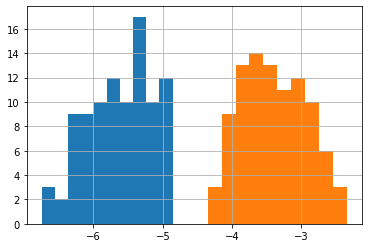

In [10]:
data5['HOMO_exp'].hist()
data5['LUMO_exp'].hist()

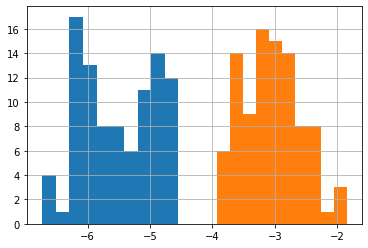

In [11]:
data5['HOMO_calc'].hist()
data5['LUMO_calc'].hist()

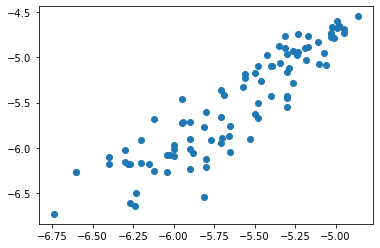

In [12]:
plt.scatter(data5['HOMO_exp'], data5['HOMO_calc'])

##gaussian Process

scores: [-1.01188049 -0.09040617 -2.42396447 -0.54594618  0.40633395  0.4446865
  0.59288678  0.35868967 -0.01149685 -0.24165988]
-51.45123884742225
3.428070800032632


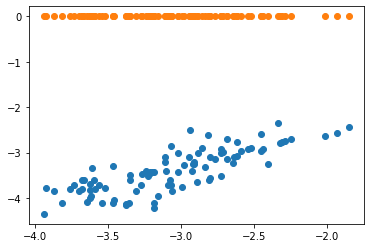

In [13]:
X = data5['LUMO_calc']
y = data5['LUMO_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score



gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)


print(f'scores: {cross_val_score(gpr, X_val, y_val, cv=10)}')

  


predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

0.8491599552898839
0.17676616601762535


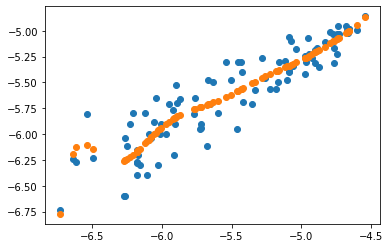

In [14]:
X = data5['HOMO_calc']
y = data5['HOMO_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold

gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

kf = KFold(n_splits=32, shuffle=True, random_state=25)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['HOMO_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['HOMO_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['HOMO_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['HOMO_exp']).reshape(-1, 1)
    #Train the model
    gpr.fit(X_train, y_train) #Training the model

predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

In [15]:
homo_exp_andres = pd.DataFrame(predict, columns=['HOMO_cal_Andres'])
homo_exp = pd.DataFrame(y, columns=['HOMO_exp'])

In [16]:
homo_data =  pd.concat([homo_exp_andres, homo_exp], axis=1, sort=False)
homo_data

,HOMO_cal_Andres,HOMO_exp
0,-5.620133,-5.480000
1,-5.706546,-5.710000
2,-5.735376,-5.940000
3,-5.760113,-5.810000
4,-5.457850,-5.260000
...,...,...
89,-6.143137,-6.300093
90,-6.258580,-6.600097
91,-5.693939,-5.500081
92,-6.255829,-6.600097


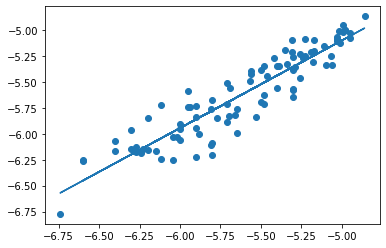

0.8491920380893856


In [17]:
from sklearn.linear_model import LinearRegression
y = homo_exp_andres
X = homo_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predict)
plt.show()

print(reg.score(X, y))

##KNN

[0.33788502 0.41462349]
0.023792118589891498
0.44356737124565726


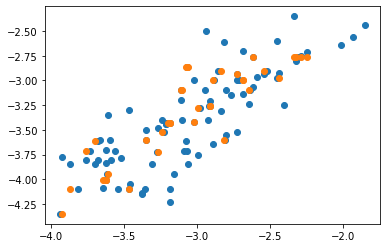

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = np.array(data5['LUMO_calc']).reshape(-1,1)
y = np.array(data5['LUMO_exp']).reshape(-1,1)
  
scaler = Normalizer()
scaler1= StandardScaler()
knn = KNeighborsRegressor(n_neighbors=1, weights='distance')
pipeline = make_pipeline(scaler1, knn)

X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
pipeline.fit(X_train, y_train)
print(cross_val_score(pipeline, X_train, y_train, cv=2))

predict = pipeline.predict(X_test)

plt.scatter(X, y)
print(pipeline.score(X_test, y_test))
print(mean_squared_error(y_test, predict)**(1/2))
plt.scatter(X_test, predict)


plt.show()

#Scharber model

In [19]:
data6 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc6.csv')
data6.head()

,key,name,donor,smiles,HOMO_calc,LUMO_calc,PCE_exp,Source,HOMO_calib,LUMO_calib,PCE_calc,PCE_calib,molW,PCE_calib_plus,PCE_calib_plus_std
0,1,1,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6ccc(c7ccc(...,-6.2060,-3.7565,0.25,NaN,-5.769127,-3.818783,2.746719,5.858438,418.408,1.376496,1.331254
1,2,2,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(-n6c(=O)c7ccc8c9ccc...,-6.2310,-3.8095,3.20,NaN,-5.918082,-4.044682,2.737661,4.883912,806.746,2.130566,1.275193
2,3,3,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc(...,-6.0405,-3.8651,0.41,NaN,-5.750096,-3.868918,3.900138,6.141742,916.927,2.298419,1.280298
3,4,4,P3HT,COc1cc2c(=O)n(C)c(=O)c3ccc4c5c(-c6ccc(-c7cc8c(...,-5.7617,-3.6931,0.76,NaN,-5.654797,-3.843035,5.592203,7.021113,1037.031,2.560097,1.292685
4,5,5,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc8...,-5.9508,-3.7279,2.35,NaN,-5.733852,-3.721853,4.204648,5.937610,1149.187,2.793039,1.296141


In [20]:
from math import exp
#e = -1.6 * 10**-19 #units: C
Eg = abs(-6.2060) - abs(-3.7565)
Voc = Eg - 0.3  #units: J/C or V
A = 85.02
a2 = 0.09097
b2 = -2.14
dj = 38.69
Jph = A - dj * Eg + a2*exp(-b2 * Eg)
print(Jph, Voc)
Jsc = 0.65*Jph
PCE = 100*(Voc*0.65*Jsc)/100
PCE

7.445321408328493 2.1495000000000006


6.761571010142888

In [21]:
e = -1.6 * 10**-19
Eg = abs(-5.2) - abs(data6['LUMO_calc'] )
Voc = Eg - 0.3
A = 85.02
a2 = 0.09097
b2 = -2.14
dj = 38.69
Jph = A - dj * Eg + a2*np.exp(-b2 * Eg)
Jsc = 0.65*Jph
PCE = 100*(Voc*0.65*Jsc)/100
print(pd.concat([pd.DataFrame(PCE), data6['PCE_calc']], axis=1, sort=False))

    LUMO_calc  PCE_calc
0   15.058360  2.746719
1   15.206516  2.737661
2   15.284318  3.900138
3   14.790461  5.592203
4   14.949446  4.204648
5   13.064201  0.000000
6   14.370898  7.516368
7   10.334943  0.348528
8   10.334943  0.381334
9    9.081644  1.357355
10  10.968455  0.600258
11  10.169012  1.276996
12  14.630242  2.689413
13  13.066113  3.540078
14  14.277957  4.410984
15   7.526970  0.000000
16   7.778929  0.000000
17   7.278361  0.000000
18  11.892850  0.000000
19   7.278361  0.000000
20  13.744700  3.912061
21   9.681626  3.537138
22   7.475397  0.000000
23  15.195009  3.242995
24  15.280462  2.751779
25  13.032259  4.179500
26   7.961043  2.239176
27   8.224828  2.036717
28   7.961043  2.746065
29   7.109575  3.774157
30  14.695703  1.165021
31  10.030780  4.410887
32   7.488437  3.660922
33  13.531637  2.176211
34  14.181565  6.415827
35  14.695703  6.192412
36  12.765188  8.684397
37   7.488437  0.000000
38   9.093865  4.184584
39  13.531637  9.545759
40   6.852039  0

In [22]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key                 49 non-null     int64  
 1   name                49 non-null     object 
 2   donor               49 non-null     object 
 3   smiles              49 non-null     object 
 4   HOMO_calc           49 non-null     float64
 5   LUMO_calc           49 non-null     float64
 6   PCE_exp             49 non-null     float64
 7   Source              25 non-null     object 
 8   HOMO_calib          49 non-null     float64
 9   LUMO_calib          49 non-null     float64
 10  PCE_calc            49 non-null     float64
 11  PCE_calib           49 non-null     float64
 12  molW                49 non-null     float64
 13  PCE_calib_plus      49 non-null     float64
 14  PCE_calib_plus_std  49 non-null     float64
dtypes: float64(10), int64(1), object(4)
memory usage: 5.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb8f637d30>,
      dtype=object)

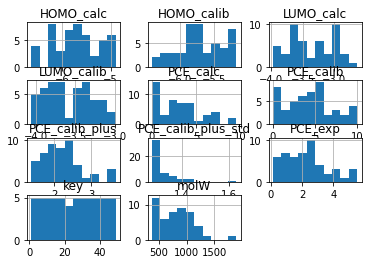

In [23]:
data6.hist()

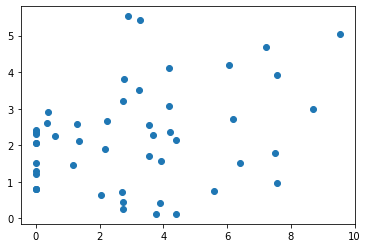

In [24]:
plt.scatter(data6['PCE_calc'], data6['PCE_exp'])

0.623160862787536
0.8400025996085425


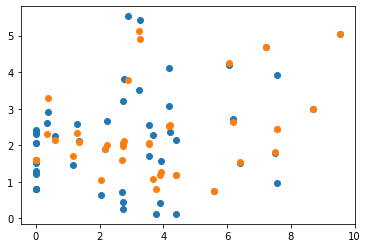

In [25]:
X = data6['PCE_calc']
y = data6['PCE_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold



gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)


kf = KFold(n_splits=25, shuffle=True, random_state=53)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['PCE_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['PCE_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['PCE_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['PCE_exp']).reshape(-1, 1)
    #Train the model
    gpr.fit(X_train, y_train) #Training the model

predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


plt.show()

In [26]:
pce_exp_andres = pd.DataFrame(predict, columns=['PCE_cal_Andres'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])

pce_data =  pd.concat([pce_exp_andres, pce_exp], axis=1, sort=False)
pce_data

,PCE_cal_Andres,PCE_exp
0,2.058578,0.25
1,1.977863,3.20
2,1.195541,0.41
3,0.748674,0.76
4,2.539890,2.35
5,1.601147,1.50
6,1.810350,1.80
7,2.300781,2.61
8,3.281661,2.90
9,2.092731,2.12


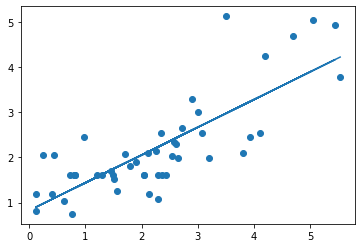

0.623865895979363
0.6523363943405955


In [27]:
from sklearn.linear_model import LinearRegression
y = pce_exp_andres
X = pce_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predict)
plt.show()

print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

In [28]:
#– Comma separated value text file containing information
#on molecules used for PCE GP calibration

data6 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc6.csv')
data6.head()

,key,name,donor,smiles,HOMO_calc,LUMO_calc,PCE_exp,Source,HOMO_calib,LUMO_calib,PCE_calc,PCE_calib,molW,PCE_calib_plus,PCE_calib_plus_std
0,1,1,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6ccc(c7ccc(...,-6.2060,-3.7565,0.25,NaN,-5.769127,-3.818783,2.746719,5.858438,418.408,1.376496,1.331254
1,2,2,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(-n6c(=O)c7ccc8c9ccc...,-6.2310,-3.8095,3.20,NaN,-5.918082,-4.044682,2.737661,4.883912,806.746,2.130566,1.275193
2,3,3,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc(...,-6.0405,-3.8651,0.41,NaN,-5.750096,-3.868918,3.900138,6.141742,916.927,2.298419,1.280298
3,4,4,P3HT,COc1cc2c(=O)n(C)c(=O)c3ccc4c5c(-c6ccc(-c7cc8c(...,-5.7617,-3.6931,0.76,NaN,-5.654797,-3.843035,5.592203,7.021113,1037.031,2.560097,1.292685
4,5,5,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc8...,-5.9508,-3.7279,2.35,NaN,-5.733852,-3.721853,4.204648,5.937610,1149.187,2.793039,1.296141


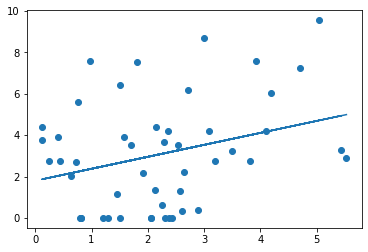

0.09136519710571012
2.4909177383323464


In [29]:
pce_cal = pd.DataFrame(data6, columns=['PCE_calc'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])

from sklearn.linear_model import LinearRegression
y = pce_cal
X = pce_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
plt.scatter(X,y)
plt.plot(X,predict)
plt.show()

print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

In [30]:
data6 = pd.read_csv('/content/drive/My Drive/proyectoSolarCells/mmc6.csv')
pce_calib = pd.DataFrame(data6, columns=['PCE_calib'])
pce_exp = pd.DataFrame(data6, columns=['PCE_exp'])
pce_calc = pd.DataFrame(data6, columns=['PCE_calc'])

pce_data =  pd.concat([pce_calib, pce_exp, pce_calc], axis=1, sort=False)
pce_data

,PCE_calib,PCE_exp,PCE_calc
0,5.858438,0.25,2.746719
1,4.883912,3.20,2.737661
2,6.141742,0.41,3.900138
3,7.021113,0.76,5.592203
4,5.937610,2.35,4.204648
5,0.000000,1.50,0.000000
6,9.990581,1.80,7.516368
7,1.096937,2.61,0.348528
8,1.286165,2.90,0.381334
9,3.175592,2.12,1.357355


In [31]:
data6.head()

,key,name,donor,smiles,HOMO_calc,LUMO_calc,PCE_exp,Source,HOMO_calib,LUMO_calib,PCE_calc,PCE_calib,molW,PCE_calib_plus,PCE_calib_plus_std
0,1,1,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6ccc(c7ccc(...,-6.2060,-3.7565,0.25,NaN,-5.769127,-3.818783,2.746719,5.858438,418.408,1.376496,1.331254
1,2,2,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(-n6c(=O)c7ccc8c9ccc...,-6.2310,-3.8095,3.20,NaN,-5.918082,-4.044682,2.737661,4.883912,806.746,2.130566,1.275193
2,3,3,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc(...,-6.0405,-3.8651,0.41,NaN,-5.750096,-3.868918,3.900138,6.141742,916.927,2.298419,1.280298
3,4,4,P3HT,COc1cc2c(=O)n(C)c(=O)c3ccc4c5c(-c6ccc(-c7cc8c(...,-5.7617,-3.6931,0.76,NaN,-5.654797,-3.843035,5.592203,7.021113,1037.031,2.560097,1.292685
4,5,5,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc8...,-5.9508,-3.7279,2.35,NaN,-5.733852,-3.721853,4.204648,5.937610,1149.187,2.793039,1.296141
